In [ ]:
# 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/uber_lyft_preprocessed1.csv

--2025-06-24 04:04:59--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/uber_lyft_preprocessed1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24015443 (23M) [text/plain]
Saving to: ‘uber_lyft_preprocessed1.csv’

uber_lyft_preproces 100%[===================>]  22.90M   141MB/s    in 0.2s    

2025-06-24 04:05:00 (141 MB/s) - ‘uber_lyft_preprocessed1.csv’ saved [24015443/24015443]



# Categorical Variables

In [ ]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['mlxtend'])


mlxtend is already installed.


In [ ]:
## 필요 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# 범주형 변수 처리

## 데이터 로드


- 데이터 설명:
  - Uber vs Lyft in the Boston
  - Raw data는 NA 가 많음
  - 원래 종속변수: Price
  - https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma



In [ ]:
rd = pd.read_csv('uber_lyft_preprocessed1.csv', index_col = 0)
rd.head()

,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,short_summary,precipIntensity,...,temperatureLow,temperatureLowTime,apparentTemperatureLowTime,icon,pressure,cloudCover,ozone,moonPhase,temperatureMinTime,apparentTemperatureMinTime
2,5,7,0,7,5,7.0,0.44,1.0,0,0.0,...,33.10,1543402800,1543392000,1,992.28,0.03,315.7,0.68,1543377600,1543377600
3,5,7,0,10,4,26.0,0.44,1.0,0,0.0,...,28.90,1543579200,1543575600,1,1013.73,0.00,291.1,0.75,1543550400,1543550400
4,5,7,0,11,6,9.0,0.44,1.0,3,0.0,...,36.71,1543478400,1543460400,4,998.36,0.44,347.7,0.72,1543402800,1543392000
10,0,8,0,12,2,13.5,1.08,1.0,0,0.0,...,31.57,1543665600,1543658400,0,1016.84,0.12,269.9,0.79,1543579200,1543579200
11,0,8,0,7,5,7.0,1.08,1.0,2,0.0,...,37.59,1543485600,1543478400,2,991.85,1.00,354.2,0.72,1543399200,1543399200


In [ ]:
X = rd.drop(columns=['price'])
y = rd['price']

# 데이터셋을 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2020)

In [ ]:
X_train

,source,destination,cab_type,product_id,name,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,temperatureLow,temperatureLowTime,apparentTemperatureLowTime,icon,pressure,cloudCover,ozone,moonPhase,temperatureMinTime,apparentTemperatureMinTime
226072,11,3,0,12,2,2.94,1.0,1,0.0,0.0,37.64,1543485600,1543478400,3,991.36,0.54,347.5,0.72,1543399200,1543399200
482463,2,7,0,7,5,3.53,1.0,2,0.0,0.0,34.90,1543712400,1543712400,2,1019.63,1.00,286.6,0.82,1543658400,1543658400
240007,6,7,0,12,2,0.98,1.0,3,0.0,0.0,36.71,1543478400,1543460400,4,998.36,0.44,347.7,0.72,1543402800,1543392000
567697,1,3,0,12,2,2.37,1.0,0,0.0,0.0,31.71,1543658400,1543658400,1,1015.68,0.00,281.4,0.79,1543579200,1543575600
49729,11,2,0,9,3,2.88,1.0,1,0.0,0.0,37.64,1543485600,1543478400,3,991.36,0.54,347.5,0.72,1543399200,1543399200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577668,3,4,0,8,7,4.60,1.0,2,0.0,0.0,37.60,1543489200,1543478400,2,994.99,1.00,354.8,0.72,1543399200,1543399200
355279,2,11,0,12,2,3.09,1.0,3,0.0,0.0,28.90,1543579200,1543575600,4,1004.67,0.25,341.3,0.75,1543550400,1543550400
561700,5,4,1,5,9,0.99,1.0,3,0.0,0.0,33.65,1543399200,1543399200,4,991.29,0.28,307.6,0.68,1543377600,1543377600
640617,8,4,1,4,8,4.48,1.0,1,0.0,0.0,33.75,1543399200,1543399200,3,990.25,0.81,313.6,0.68,1543377600,1543377600


## 연속형 변수만 사용했을 때

In [ ]:
## 기본 범주형 변수 제거 코드
# X_train_numeric = X_train.select_dtypes(exclude=['object'])
# X_train_numeric

## 메뉴얼 범주형 변수 제거
X_train_numeric = X_train.drop(['source', 'cab_type', 'name', 'short_summary', 'destination'], axis = 1)
X_train_numeric

,product_id,distance,surge_multiplier,precipIntensity,precipProbability,temperatureLow,temperatureLowTime,apparentTemperatureLowTime,icon,pressure,cloudCover,ozone,moonPhase,temperatureMinTime,apparentTemperatureMinTime
226072,12,2.94,1.0,0.0,0.0,37.64,1543485600,1543478400,3,991.36,0.54,347.5,0.72,1543399200,1543399200
482463,7,3.53,1.0,0.0,0.0,34.90,1543712400,1543712400,2,1019.63,1.00,286.6,0.82,1543658400,1543658400
240007,12,0.98,1.0,0.0,0.0,36.71,1543478400,1543460400,4,998.36,0.44,347.7,0.72,1543402800,1543392000
567697,12,2.37,1.0,0.0,0.0,31.71,1543658400,1543658400,1,1015.68,0.00,281.4,0.79,1543579200,1543575600
49729,9,2.88,1.0,0.0,0.0,37.64,1543485600,1543478400,3,991.36,0.54,347.5,0.72,1543399200,1543399200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
577668,8,4.60,1.0,0.0,0.0,37.60,1543489200,1543478400,2,994.99,1.00,354.8,0.72,1543399200,1543399200
355279,12,3.09,1.0,0.0,0.0,28.90,1543579200,1543575600,4,1004.67,0.25,341.3,0.75,1543550400,1543550400
561700,5,0.99,1.0,0.0,0.0,33.65,1543399200,1543399200,4,991.29,0.28,307.6,0.68,1543377600,1543377600
640617,4,4.48,1.0,0.0,0.0,33.75,1543399200,1543399200,3,990.25,0.81,313.6,0.68,1543377600,1543377600


In [ ]:
model_num = LinearRegression()
model_num.fit(X_train_numeric,
              y_train)

print('R2:', model_num.score(X_train_numeric, y_train)) ## R2값

## 적합 모형 수정 R^2 값 확인
def adjusted_r2(model, X, y):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return adj_r2

adj_r2_num = adjusted_r2(model_num, X_train_numeric, y_train) ## adj R2 값
print('adj R2:', adj_r2_num)

R2: 0.1125950272323506
adj R2: 0.11250297341120474


## 범주형 변수 처리
- 범주형 변수 처리할 변수 선택
- 더미변수화 진행
  - 원-핫 인코딩
  - 기준 범주 제거(이렇게 해야 다중공선성 제거)

In [ ]:
## 사용자가 더미 변수화를 하고 싶은 변수를 선택
sel_categorical_columns = ['source',
                           'cab_type',
                           'name',
                           'short_summary',
                           'destination']

## 선택된 범주형 변수 더미 변수화 (원-핫 인코딩 + 기준 범주 제거)
## 기준 범주를 제거해줘야 다중공선성 제거
X_train_w_cate = pd.get_dummies(
                                                              X_train,
                                                              columns = sel_categorical_columns,
                                                              drop_first = True) # 다중공선성 제거(True)

X_train_w_cate.head().T

,226072,482463,240007,567697,49729
product_id,12,7,12,12,9
distance,2.94,3.53,0.98,2.37,2.88
surge_multiplier,1.0,1.0,1.0,1.0,1.0
precipIntensity,0.0,0.0,0.0,0.0,0.0
precipProbability,0.0,0.0,0.0,0.0,0.0
temperatureLow,37.64,34.9,36.71,31.71,37.64
temperatureLowTime,1543485600,1543712400,1543478400,1543658400,1543485600
apparentTemperatureLowTime,1543478400,1543712400,1543460400,1543658400,1543478400
icon,3,2,4,1,3
pressure,991.36,1019.63,998.36,1015.68,991.36


In [ ]:
## 참고
# X_train_w_cate = pd.get_dummies(X_train,
#                      columns=sel_categorical_columns,
#                      drop_first = False) # 다중공선성 제거(True)!!!!
# X_train_w_cate.head().T

## 종속 변수 및 독립변수 설정

In [ ]:
model_w_cate = LinearRegression()
model_w_cate.fit(X = X_train_w_cate,
                 y = y_train)

print('R2:', model_w_cate.score(X_train_w_cate, y_train)) ## R2값

adj_r2_w_cate = adjusted_r2(model_w_cate, X_train_w_cate, y_train) ## adj R2 값
print('adj R2:', adj_r2_w_cate)

R2: 0.9290605023671342
adj R2: 0.9290344943749471


### statsmodels 이용 회귀분석 결과 확인



In [ ]:
## statsmodels 이용 회귀분석 결과 확인
# 데이터 타입 확인 및 변환
X_train_w_cate = X_train_w_cate.astype(float)
y_train = y_train.astype(float)


# 상수항 추가
X_train_w_cate = add_constant(X_train_w_cate)

# 모델 생성 및 학습
model = sm.OLS(y_train, X_train_w_cate)
results = model.fit()

# 요약 결과 출력
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 4.116e+04
Date:                Tue, 24 Jun 2025   Prob (F-statistic):               0.00
Time:                        04:05:04   Log-Likelihood:            -3.2570e+05
No. Observations:              144617   AIC:                         6.515e+05
Df Residuals:                  144570   BIC:                         6.520e+05
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
product_id                   -49.9932     70.024     -0.714      0.475    -187.240      87.253
distance                       2.8208      0.008    368.793      0.000       2.806       2.836
surge_multiplier            -955.9710   1356.773     -0.705      0.481   -3615.220    1703.278
precipIntensity            -3.258e-05   4.62e-05     -0.705      0.481      -0.000    5.81e-05
precipProbability             -0.0002      0.000     -0.705      0.481      -0.001       0.000
temperatureLow                 0.0095      0.007      1.447      0.148      -0.003       0.022
temperatureLowTime          1.746e-06   1.96e-06      0.890      0.373    -2.1e-06    5.59e-06
apparentTemperatureLowTime -3.658e-07   1.84e-06     -0.199      0.842   -3.97e-06    3.24e-06
icon                           0.0040      0.015      0.273      0.785      -0.025       0.033
pressure                       0.0075      0.003      2.396      0.017       0.001       0.014
cloudCover                    -0.1465      0.073     -2.002      0.045      -0.290      -0.003
ozone                          0.0009      0.001      1.656      0.098      -0.000       0.002
moonPhase                     -3.7225      3.372     -1.104      0.270     -10.331       2.886
temperatureMinTime         -2.959e-06   2.39e-06     -1.237      0.216   -7.65e-06    1.73e-06
apparentTemperatureMinTime   2.61e-06   2.19e-06      1.190      0.234   -1.69e-06    6.91e-06
source_1                      -0.4642      0.030    -15.580      0.000      -0.523      -0.406
source_2                     -80.1223    113.064     -0.709      0.479    -301.726     141.482
source_3                     -79.8942    113.065     -0.707      0.480    -301.498     141.710
source_4                       0.1965      0.031      6.337      0.000       0.136       0.257
source_5                     -79.3539    113.064     -0.702      0.483    -300.958     142.250
source_6                     -79.2086    113.064     -0.701      0.484    -300.813     142.396
source_7                      -0.1708      0.030     -5.668      0.000      -0.230      -0.112
source_8                     -80.0638    113.064     -0.708      0.479    -301.668     141.540
source_9                     -79.5405    113.065     -0.703      0.482    -301.145     142.064
source_10                      0.3118      0.030     10.321      0.000       0.253       0.371
source_11                     -0.0879      0.030     -2.935      0.003      -0.147      -0.029
cab_type_1                  -497.5960    704.003     -0.707      0.480   -1877.428     882.236
name_1                        59.7394     70.024      0.853      0.394     -77.507     196.986
name_2                        48.9530     66.266      0.739      0.460     -80.927     178.833
name_3                       -95.9083    14

### 범주형 변수 해석 방법


- 기준 범주
  - 범주형 변수의 범주 중 하나는 기준 범주로 사용됨
  - 이 기준 범주와 나머지 범주 간 비교를 해야 함
  - 예를 들어, source 변수가 있고, source_1이 기준 범주라면, 다른 source 변수들은 source_1과의 비교를 통해 이해될 수 있음

- 더미 변수 계수
  - 더미 변수의 계수는 해당 범주가 기준 범주와 비교하여 종속 변수에 미치는 영향을 나타냄
  - 양의 회의 계수는 해당범주가 기준 범주에 비해 종속변수의 값을 증가시키는 반면, 음의 계수는 감소시킴

- p-value 해석
  - 각 더미 변수의 p-value는 해당 범주가 기준 범주에 비해 유의미한 차이가 있는지를 나타냄
  - 일반적으로 p-value가 0.05보다 작으면 유의미한 차이가 있다고 봄

- short_summary 변수
  - 기존에는 총4개의 범주를 가졌으나X_train['short_summary'].unique()로 확인
  - 현재 모델에는 3개의 범주가 되었음(기준 변수를 제거했기 때문)
  - 회귀분석 결과:
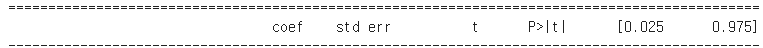
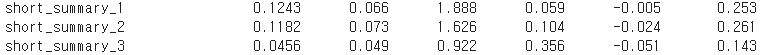

### 추가적인 해석
- 기준변수( 이경우 short_summary_0)가 유의한지 알고 싶은 경우
  - 기준변수는 더미변수화 과정에서 제거되어 회귀 분석 결과에 직접적으로 나타나지 않음
  - 다음과 같은 방법이 가능
    - 1. drop_first - False 사용(다중공선성 가능성 무시)
    - 2. 기준변수를 바꿔서 다시 모델 적합
      

- 같은 범주형 변수인데, 어떤 변수는 p값이 0.05보다 작고 어떤것은 아닌경우..
  - 같은 범주형 변수의 다른 범주들이 회귀 분석에서 p값이 0.05보다 작은 경우와 그렇지 않은 경우가 존재할 수 있음
  - 만약 이런경우에는 각 범주가 기준 범주와 비교할 때 종속 변수에 미치는 영향이 다르다는 것을 의미함
  